# Q1 - 50_Startups

Prepare a prediction model for profit of 50_startups data.

Do transformations for getting better predictions of profit and

make a table containing R^2 value for each prepared model.

R&D Spend -- Research and devolop spend in the past few years

Administration -- spend on administration in the past few years

Marketing Spend -- spend on Marketing in the past few years

State -- states from which data is collected

Profit  -- profit of each state in the past few years

In [253]:
import pandas as pd
import seaborn as sns
import numpy as np
import statsmodels.formula.api as smf
import statsmodels.api as sm
import matplotlib.pyplot as plt
import statsmodels.graphics.regressionplots as smr

In [254]:
df = pd.read_csv("50_Startups.csv")
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


To predict Profit(y) given x1(R&D Spend), x2(Administration), x3(Marketing Spend), x4(State)

# Check for independance of features
Now, we find the correlation between various features

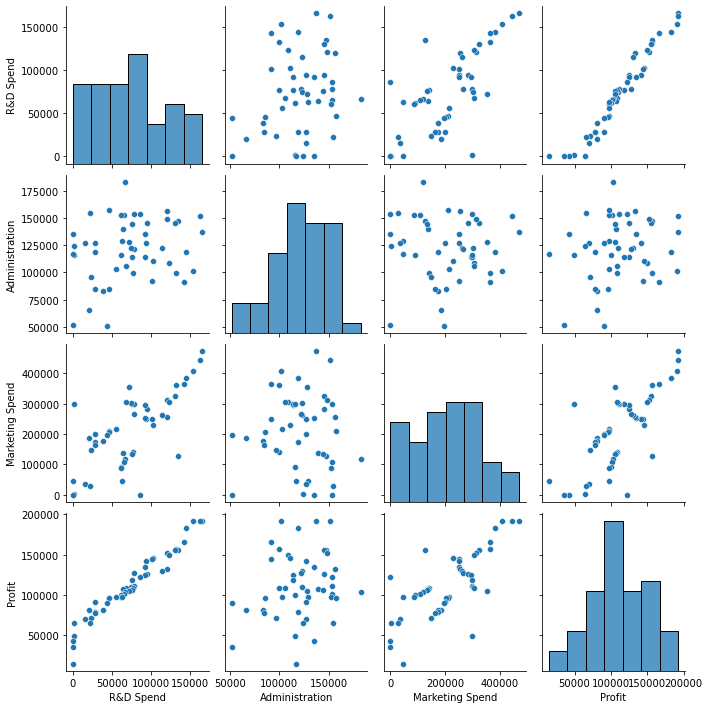

In [255]:
sns.pairplot(data=df)

In [256]:
df.corr()

,R&D Spend,Administration,Marketing Spend,Profit
R&D Spend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
Marketing Spend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


In [266]:
#To check for duplicated records
df.duplicated().sum()

0

In [261]:
#To check if any of the values is empty
df.isnull().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [263]:
# To check if any NA values present
df.isna().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [205]:
df.count()

R&D Spend          50
Administration     50
Marketing Spend    50
State              50
Profit             50
dtype: int64

From correlation plot and metrics we see that Marketing spend and R&D Spend have some amount of postive correlation but since data points less, hence we continue with our processing

In [206]:
df.State.value_counts()

New York      17
California    17
Florida       16
Name: State, dtype: int64

In [207]:
#To convert the categorical varibale to numerical value
df["State"]=df["State"].map({"California":1, "New York":2, "Florida":3})
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,2,192261.83
1,162597.70,151377.59,443898.53,1,191792.06
2,153441.51,101145.55,407934.54,3,191050.39
3,144372.41,118671.85,383199.62,2,182901.99
4,142107.34,91391.77,366168.42,3,166187.94


In [208]:
df=df.rename(mapper={"R&D Spend":"RandD_Spend", "Marketing Spend":"Marketing_Spend"},axis=1)
df.head()

,RandD_Spend,Administration,Marketing_Spend,State,Profit
0,165349.20,136897.80,471784.10,2,192261.83
1,162597.70,151377.59,443898.53,1,191792.06
2,153441.51,101145.55,407934.54,3,191050.39
3,144372.41,118671.85,383199.62,2,182901.99
4,142107.34,91391.77,366168.42,3,166187.94


In [209]:
mlr_rdspend=smf.ols("RandD_Spend~Administration+Marketing_Spend+State",data=df).fit()
vif_rdspend = 1/(1-mlr_rdspend.rsquared)
mlr_adminspend=smf.ols("Administration~RandD_Spend+Marketing_Spend+State",data=df).fit()
vif_adminspend = 1/(1-mlr_adminspend.rsquared)
mlr_mktspend=smf.ols("Marketing_Spend~RandD_Spend+Administration+State",data=df).fit()
vif_mktspend = 1/(1-mlr_mktspend.rsquared)
mlr_state=smf.ols("State~RandD_Spend+Administration+Marketing_Spend",data=df).fit()
vif_state = 1/(1-mlr_state.rsquared)
df_vif = pd.DataFrame()
df_vif["Feauture"] = ["RandD_Spend","Administration","Marketing_Spend","State"]
df_vif["R^2"]= [mlr_rdspend.rsquared,mlr_adminspend.rsquared,mlr_mktspend.rsquared,mlr_state.rsquared]
df_vif["VIF"]=[vif_rdspend,vif_adminspend,vif_mktspend,vif_state]
df_vif

,Feauture,R^2,VIF
0,RandD_Spend,0.595322,2.471101
1,Administration,0.149891,1.176319
2,Marketing_Spend,0.582097,2.392898
3,State,0.048265,1.050713


+ From the VIF metrics it is clear that none of the varibales are dependant on each other

# Creating the model

In [210]:
mlr = smf.ols("Profit~RandD_Spend+Administration+Marketing_Spend+State",data=df).fit()

In [211]:
mlr.params

Intercept          49970.530183
RandD_Spend            0.805794
Administration        -0.026913
Marketing_Spend        0.027065
State                 96.993190
dtype: float64

In [212]:
mlr.rsquared

0.9507497035198483

In [213]:
mlr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.946
Method:                 Least Squares   F-statistic:                     217.2
Date:                Mon, 06 Sep 2021   Prob (F-statistic):           8.50e-29
Time:                        20:17:54   Log-Likelihood:                -525.38
No. Observations:                  50   AIC:                             1061.
Df Residuals:                      45   BIC:                             1070.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        4.997e+04   7137.148      7.001      0.000    3.56e+04    6.43e+04
RandD_Spend         0.8058      0.046     17.646      0.000       0.714       0.898
Administration     -0.0269      0.052     -0.521      0.605      -0.131       0.077
Marketing_Spend     0.0271      0.017      1.605      0.116      -0.007       0.061
State              96.9932   1666.037      0.058      0.954   -3258.577    3452.563
==============================================================================
Omnibus:                       14.730   Durbin-Watson:                   1.281
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.048
Skew:                          -0.948   Prob(JB):                     2.69e-05
Kurtosis:                       5.551   Cond. No.                     1.51e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.51e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Check if errors belong to normal distributions

In [214]:
mlr.resid.values

array([  -224.55252405,   2764.2275096 ,   8828.03824881,   9225.59373057,
        -6033.51294753,  -6573.51695241,  -1912.4502049 ,  -4351.41230608,
          483.49556784,  -5019.49734531,  10513.68183376,   8782.05424671,
        12353.85180833,   6921.13405223, -17037.75098674, -16314.887127  ,
        10180.96611172,  -4811.69324794,  -4834.69074755,   7107.37358345,
         1942.79319139,  -5991.1118408 ,  -4438.48103699,  -1347.2792905 ,
        -4826.77172984,   5252.22795528,  -4976.44796979,  -9377.7348444 ,
         1514.82040188,   -805.52107972,    367.0890771 ,   -222.24005247,
        -1503.77745173,  -1234.76197057,   7774.23616382,   5963.74414874,
        15325.59385537,    417.9193381 ,  11524.34707894,  -2635.01615212,
         3516.06266832,   2889.81809325,    964.37216843,   9566.5559421 ,
          661.54272227,  17245.39314928,  -6755.1326695 ,  -3863.03977458,
       -13535.32058876, -33460.33180601])

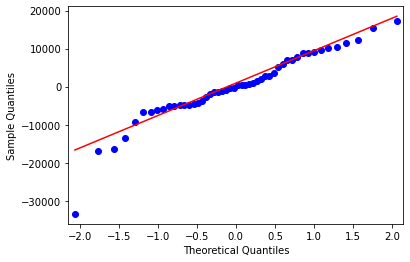

In [215]:
qqplot = sm.qqplot(data = mlr.resid.values,line='q')

Here we see that the since the sample quantiles and theoretical quantiles lie on same straight line, hence proved all errors belong to same normal distribution ~N(0,σ^2)

# To check if errors belong to distributions of constant variance and are independant of each other

In [216]:
def get_standardized_values(data):
    data=(data-np.mean(data))/np.std(data)
    return data

Text(0, 0.5, 'ε')

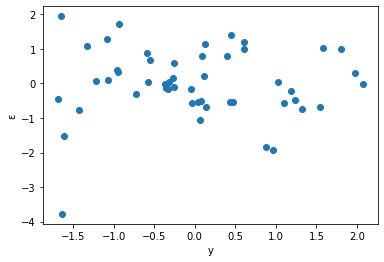

In [217]:
X= get_standardized_values(mlr.fittedvalues)
Y= get_standardized_values(mlr.resid)
plt.scatter(X,Y)
plt.xlabel("y")
plt.ylabel("ε")

Text(0, 0.5, 'ε')

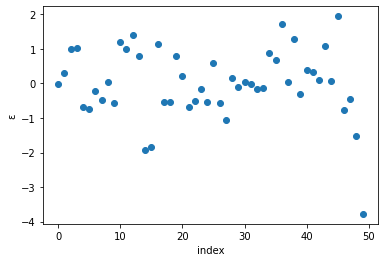

In [218]:
X = []
for i in range(0,50):
    X.append(i)
plt.scatter(X,Y)
plt.xlabel("index")
plt.ylabel("ε")

From the plot of ε plot and ε vs y we see that there is no pattern, hence these variables are independant

# To check if the parameters are linear in nature

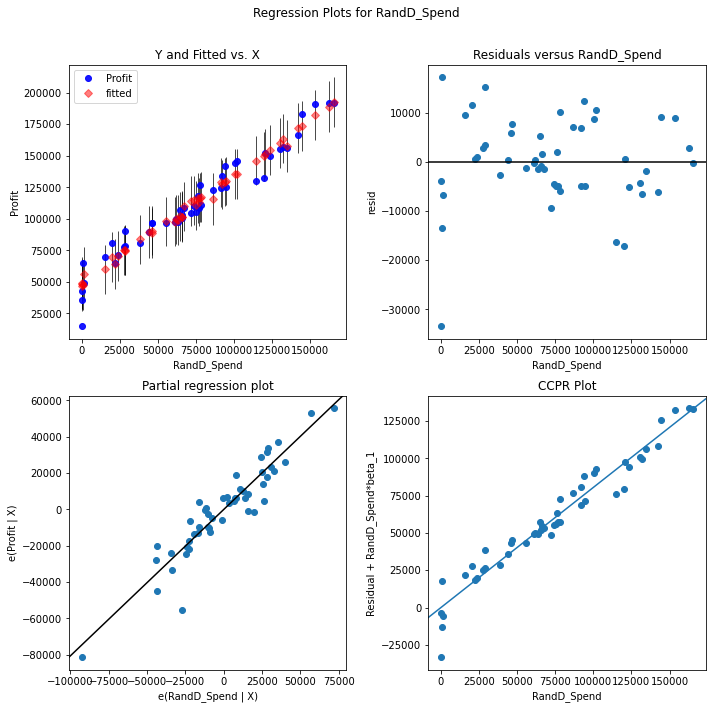

In [219]:
fig = plt.figure(figsize=(10,10))
regplot = smr.plot_regress_exog(mlr,"RandD_Spend",fig=fig)

Here we see that RandD_Spend and error is independant of each other. Also we see that both Profit and RandD_Spend are correlated from the partial regression plot

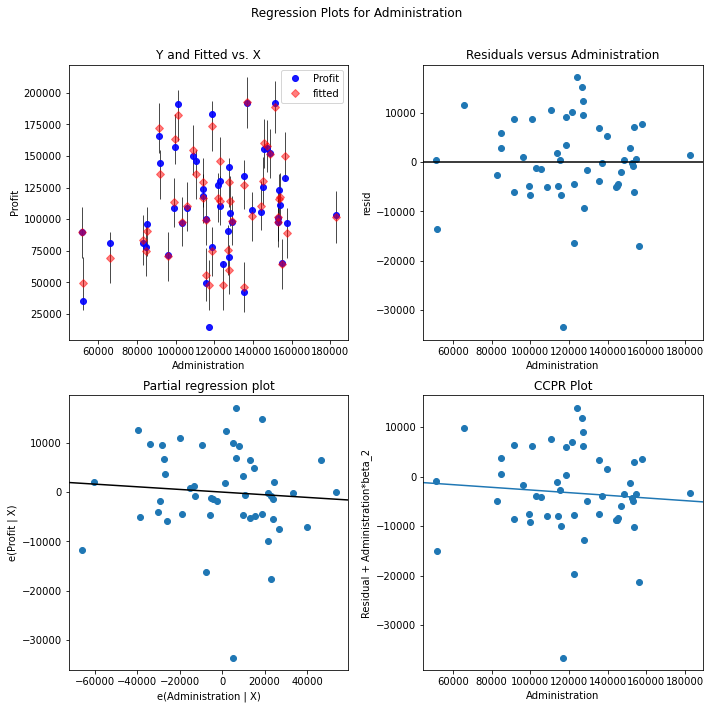

In [220]:
fig = plt.figure(figsize=(10,10))
regplot = smr.plot_regress_exog(mlr,"Administration",fig=fig)

Here we see that Administration and error is independant of each other. Also we see that both Profit and Administration are correlated from the partial regression plot

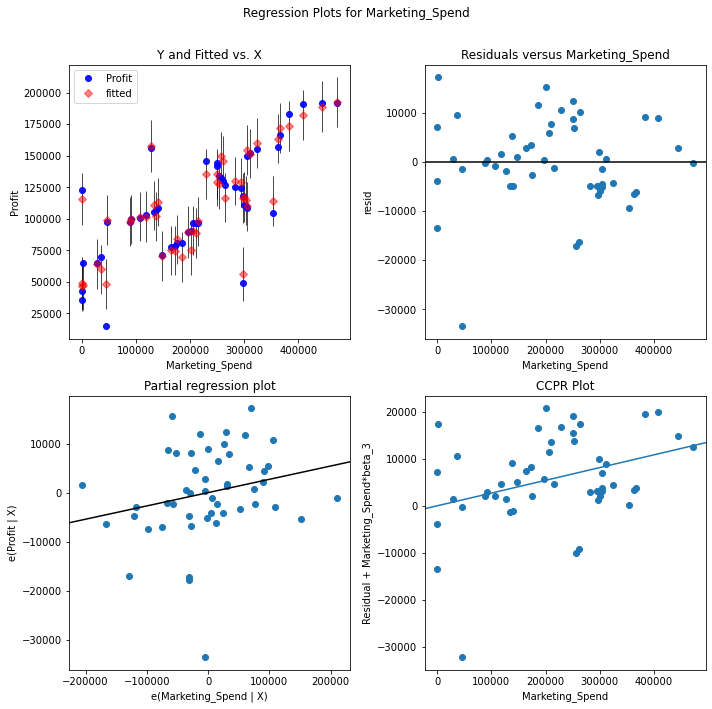

In [221]:
fig = plt.figure(figsize=(10,10))
regplot = smr.plot_regress_exog(mlr,"Marketing_Spend",fig=fig)

Here we see that Marketing_Spend and error is independant of each other. Also we see that both Profit and Marketing_Spend are correlated from the partial regression plot

# Identifying the outliers

Text(0, 0.5, "Cook's Distance")

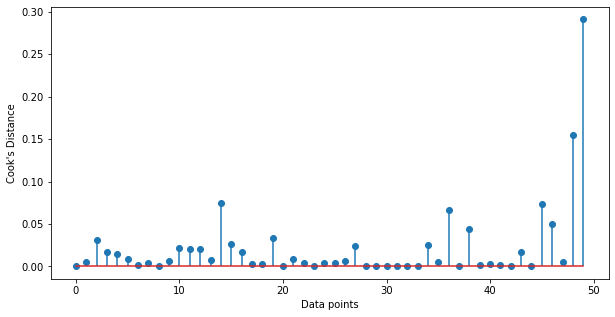

In [222]:
inf = mlr.get_influence()
c,b=inf.cooks_distance
x_axis = []
for i in range(0,df.count()[0]):
    x_axis.append(i)
fig = plt.figure(figsize=(10,5))
plt.stem(x_axis,np.round(c,3))
plt.xlabel("Data points")
plt.ylabel("Cook's Distance")

In [223]:
cutoff = 3*(4+1)/50
count = 0
for val in c:
    if val>cutoff:
        print(count)
    count=count+1

As per Cook's distance, none of the points can be considered as outliers

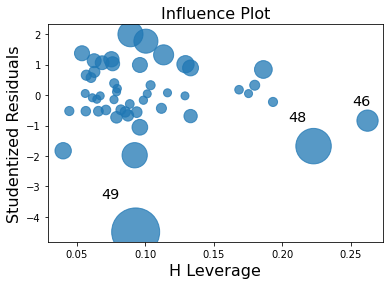

In [224]:
inf_plot=smr.influence_plot(results=mlr)

# Optimising the model
Even though none of the points are high influence points as per Cook's distance, but still we try dropping the highest 2 influence data points by looking at influence and check if any improvement in R2

In [225]:
df_new = df.drop(index=[48,49],axis=0)
df_new.tail()

,RandD_Spend,Administration,Marketing_Spend,State,Profit
43,15505.73,127382.30,35534.17,2,69758.98
44,22177.74,154806.14,28334.72,1,65200.33
45,1000.23,124153.04,1903.93,2,64926.08
46,1315.46,115816.21,297114.46,3,49490.75
47,0.00,135426.92,0.00,1,42559.73


In [226]:
mlr1 = smf.ols("Profit~RandD_Spend+Administration+Marketing_Spend+State",data=df_new).fit()
mlr1.rsquared

0.9628357485186962

In [227]:
mlr1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.963
Model:                            OLS   Adj. R-squared:                  0.959
Method:                 Least Squares   F-statistic:                     278.5
Date:                Mon, 06 Sep 2021   Prob (F-statistic):           3.93e-30
Time:                        20:18:00   Log-Likelihood:                -493.23
No. Observations:                  48   AIC:                             996.5
Df Residuals:                      43   BIC:                             1006.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        5.995e+04   6291.714      9.528      0.000    4.73e+04    7.26e+04
RandD_Spend         0.7887      0.037     21.462      0.000       0.715       0.863
Administration     -0.0622      0.044     -1.401      0.168      -0.152       0.027
Marketing_Spend     0.0179      0.014      1.293      0.203      -0.010       0.046
State            -575.1624   1340.420     -0.429      0.670   -3278.377    2128.052
==============================================================================
Omnibus:                        0.254   Durbin-Watson:                   1.833
Prob(Omnibus):                  0.881   Jarque-Bera (JB):                0.441
Skew:                           0.106   Prob(JB):                        0.802
Kurtosis:                       2.581   Cond. No.                     1.67e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.67e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [231]:
r2 = pd.DataFrame()
r2["Before Dropping"]= [0.951]
r2["After Dropping"] = [0.963]
r2

,Before Dropping,After Dropping
0,0.951,0.963


# Since there is improvement in R2 value we go for the model after dropping the 49th and 50th observation
i.e model Profit~RandD_Spend+Administration+Marketing_Spend+State

R^2 = 0.963